<a href="https://colab.research.google.com/github/Rocyan4/Data_science/blob/master/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análisando dados reais do Titanic##

O "Titanic Challenge" é o clássico desafio do site [Kaggle](https://www.kaggle.com/) considerado para muitos o "hello word!" do universo de Ciência de dados.

Todos nos conhecemos a história do fato triste do naufrágio ocorrido em 1912.

O **Titanic** era considerada uma inovação tecnologica, era o maior de todos e também conhecido como "infundável"








##Checklist

1. Qual o problema do caso?
2. Como obter os dados dados?
3. Análise exploratória
4. Tratamento dos dados
5. Construir o modelo para a solução
6. Avaliação do caso e conclusão.


# 1. Qual o problema do caso?

O Titanic naufragou devido à alguns fatores, entre eles estão causas naturais, baixa visibildade e chocando-se contra um iceberg, e também por falha humana, pois a tripulação acreditava que aumentar a velocidade em baixa visibilidade era uma das soluções utilizadas na época.

O grande **objetivo** é ao sabemos que a quantidade de botes salva-vidas não eram suficientes para a tripulação e passageiros. Devemos avaliar as variáveis que tiveram maior influência na probabildade de sobrevivência.

Após obter esses resultados, através da construção de um modelo de Machine Learning iremos buscar uma solução para que todos ou mais vidas fossem salvas.




2. Como obter os dados dados?
Para realizar o download dos dados é necessário um cadastro no site kaggle e baixa-lo clicando neste link [dataset](https://www.kaggle.com/c/titanic), logo após baixar teremos dois arquivos (.csv).



1.   Treino (train.csv)
 *   Utilizado para construir o modelo, nesse dataset é informado se o passageiro sobreviveu ou não.
2.   Teste (test.csv)
  *   Dados não vistos pelo modelo.








In [244]:
# Análise de dados
import pandas as pd
import numpy as np



# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Classe de Regressão Linear
from sklearn.linear_model import LinearRegression

# Validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings('ignore')

In [245]:
#Importando o drive para dentro do notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
# Incluindo no notebook os arquivos .csv apartir do google drive
train = pd.read_csv("/content/drive/My Drive/train.csv")
test = pd.read_csv('/content/drive/My Drive/test.csv')

In [247]:
#pd.options.display.max_columns = None

3. Análise exploratória

Agora vamos entender cada variável, alguns pontos são importantes em todo processo de transformação dos dados, tais como, os dados ausentes, tipo de distribuição e a classificação desses dados.

**Entendendo os Dados**


PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre

0 = Não

1 = Sim

* Pclass: Classe do bilhete

      1 = 1ª Classe

      2 = 2ª Classe

      3 = 3ª Classe

* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da Passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto no qual o passageiro embarcou

      C = Cherbourg

      Q = Queenstown(cobh - atualmente)

      S = Southampton





In [248]:
# Comando head para analisármos as 5 primeiras linhas do dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Utilizaremos o comando describe para descobrimos a distribuição estatística do dataset.**

In [249]:
train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** Contagens de tipos de variáveis (linhas e colunas)**


In [250]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))


Variáveis:	12
Entradas:	891


**Para identificarmos melhor criaremos uma função para identificar a faixa de idade de cada passageiro e iremos incluir no dataset**

In [251]:
# função identificação
def classificar(age):
  if age < 18:
    return 'Criança'
  if age > 18:
    return 'Adulto'
  else:
    return 'Idoso'

In [252]:
train['Idade'] = train['Age'].apply(classificar)

In [253]:
train[['Idade','Survived']].groupby(['Idade']).mean()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Idoso
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adulto


**Identificando a quantidade de dados ausentes**

In [254]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Idade            0
dtype: int64

In [255]:
#Porcentagem
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)


Cabin          0.771044
Age            0.198653
Embarked       0.002245
Idade          0.000000
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [256]:
# Indentificar as variáveis únicas
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [257]:
# Verificando a frequência dos valores de 'Embarked'
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [258]:
# Substituindo os valores nulos de 'Embarked' por 'S'
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'



In [259]:
# Substituindo os valores nulos de 'Age' pela mediana da coluna
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].median()



In [260]:
# Verificando 'Age' agora dados ausentes
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

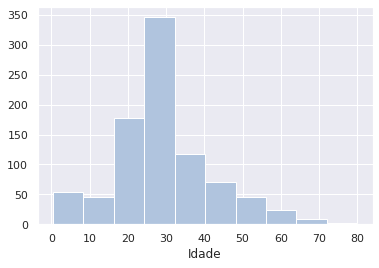

In [261]:
# Histograma de idades
sns.set()
plt.hist(train['Age'], color='lightsteelblue')
plt.xlabel("Idade")
plt.show()

In [262]:
# Eu gosto de criar uma variável para indentificar e evitar erros na hora de digitar o nome das colunas
cols = train.columns.values
cols

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Idade'],
      dtype=object)

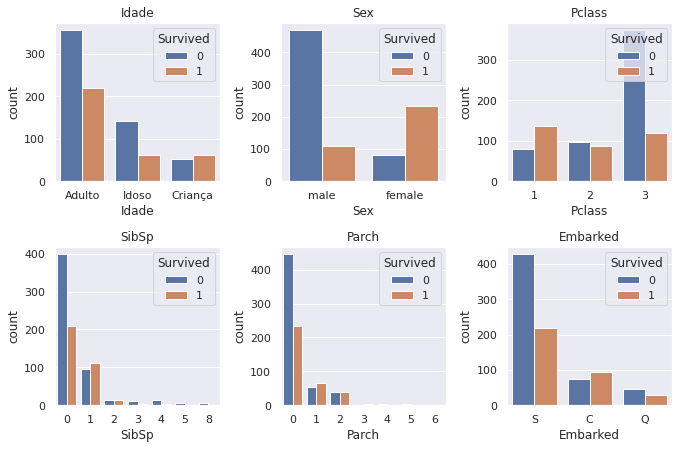

In [263]:
# Plotagem de gráficos para cada uma das variáveis escolhidas

colunas = ['Idade','Sex',"Pclass",'SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots (n_rows,n_cols,  figsize = (n_cols * 3.2,n_rows * 3.2))

for i in range(0,n_rows):
  for c in range(0,n_cols):

    plot = i*n_cols + c 

    ax = axs[i][c]
    sns.countplot(train[colunas[plot]], hue=train['Survived'], ax=ax)
    ax.set_title(colunas[plot])
    ax.legend( title='Survived', loc = 'upper right')

    plt.tight_layout()   

In [264]:
#Sobreviventes
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Qual a probablidade de sobreviver se olharmos por sexo dos passageiros?**

In [265]:

train[['Sex', 'Survived']].groupby(['Sex']).mean()


,Survived
Sex,
female,0.742038
male,0.188908


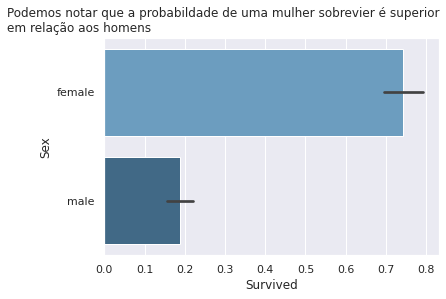

In [266]:
train['Sex'].unique()
train[['Sex', "Survived"]].groupby(['Sex']).mean()
plot = sns.barplot(x='Survived', y='Sex', data=train, palette="Blues_d", order=['female','male'])

plot.figure.text(-0.1, 0.9,
  'Podemos notar que a probabildade de uma mulher sobrevier é superior\n'
  'em relação aos homens',
   fontsize=12);


**Se criarmos uma tabela dinâmica podemos ver a relação entre sexo e classe do passagem com sua probabildade de viver**

In [267]:
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [268]:
# Verificando a probabilidade por cidade que embarcou
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


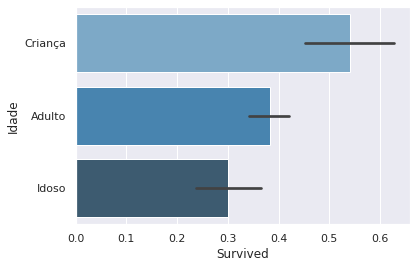

In [269]:
plot = sns.barplot(x='Survived', y='Idade',  data = train, palette="Blues_d", order=['Criança','Adulto','Idoso'])


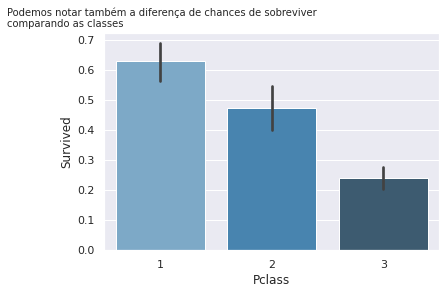

In [270]:
plot = sns.barplot(x='Pclass', y='Survived',  data = train, palette="Blues_d", )
plot.figure.text(-0.1, 0.9,
     'Podemos notar também a diferença de chances de sobreviver\n'
     'comparando as classes',
      fontsize=10);



In [271]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 12)


In [272]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Idade'], axis=1, inplace=True)


In [273]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [274]:

# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)





In [275]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1},)


# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [276]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [277]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [278]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)

In [279]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [280]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)